In [1]:
## Coding when learning from Vizuara AI labs
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

# Convert lists to numpy arrays
i = np.array(inputs)
w = np.array(weights)
b = np.array(biases)

In [50]:
print(w)
print(w.shape)
a1 = np.sum(w)
print(a1)
print(a1.shape)
a2 = np.sum(w,axis = 0)
print(a2)
print(a2.shape)
a3 = np.sum(w,axis = 1)
print(a3)
print(a3.shape)
a4 = np.sum(w,axis = 0, keepdims=True)
print(a4)
print(a4.shape)
a5 = np.sum(w,axis = 1, keepdims = True)
print(a5)
print(a5.shape)

a6 = np.max(w,axis = 0)
print(a6)
a7 = np.max(w,axis = 1)
print(a7)
a8 = np.max(w,axis = 0, keepdims=True)
print(a8)
a9 = np.max(w,axis = 1, keepdims = True)
print(a9)

[[ 0.2   0.8  -0.5   1.  ]
 [ 0.5  -0.91  0.26 -0.5 ]
 [-0.26 -0.27  0.17  0.87]]
(3, 4)
1.3599999999999999
()
[ 0.44 -0.38 -0.07  1.37]
(4,)
[ 1.5  -0.65  0.51]
(3,)
[[ 0.44 -0.38 -0.07  1.37]]
(1, 4)
[[ 1.5 ]
 [-0.65]
 [ 0.51]]
(3, 1)
[0.5  0.8  0.26 1.  ]
[1.   0.5  0.87]
[[0.5  0.8  0.26 1.  ]]
[[1.  ]
 [0.5 ]
 [0.87]]


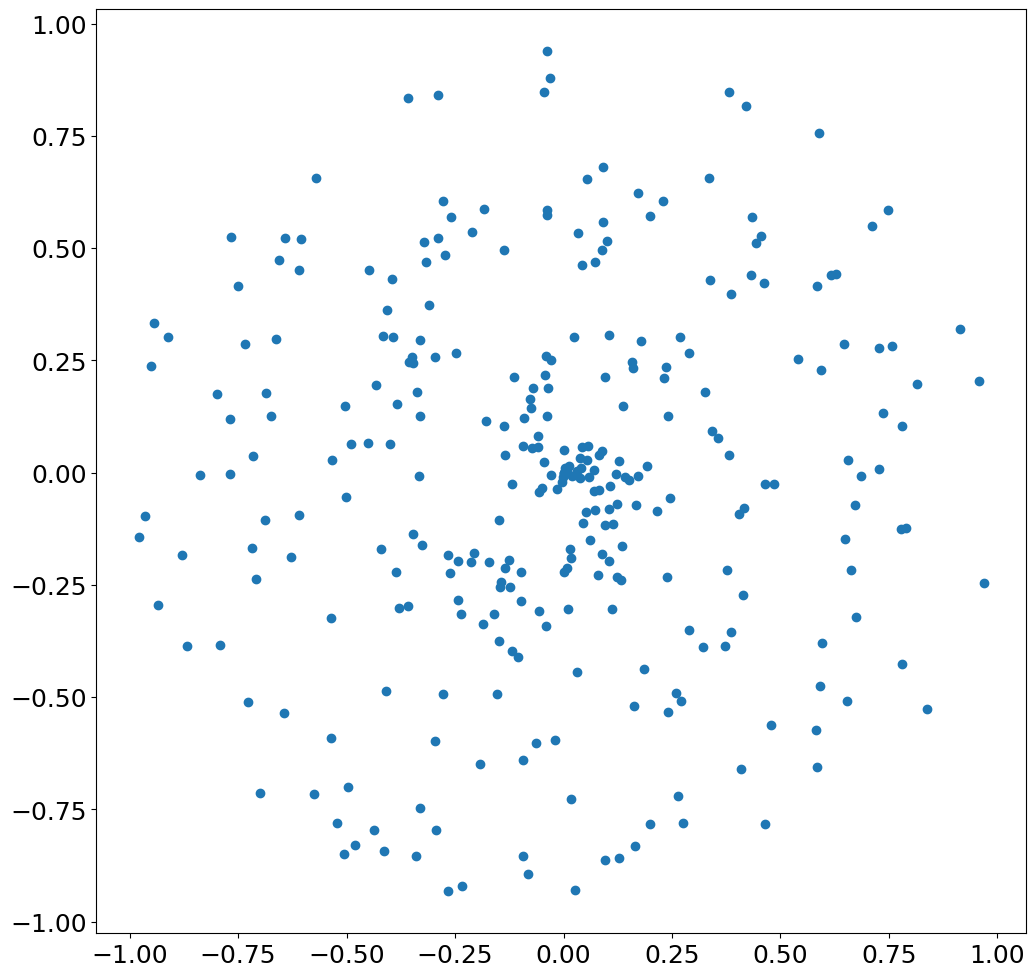

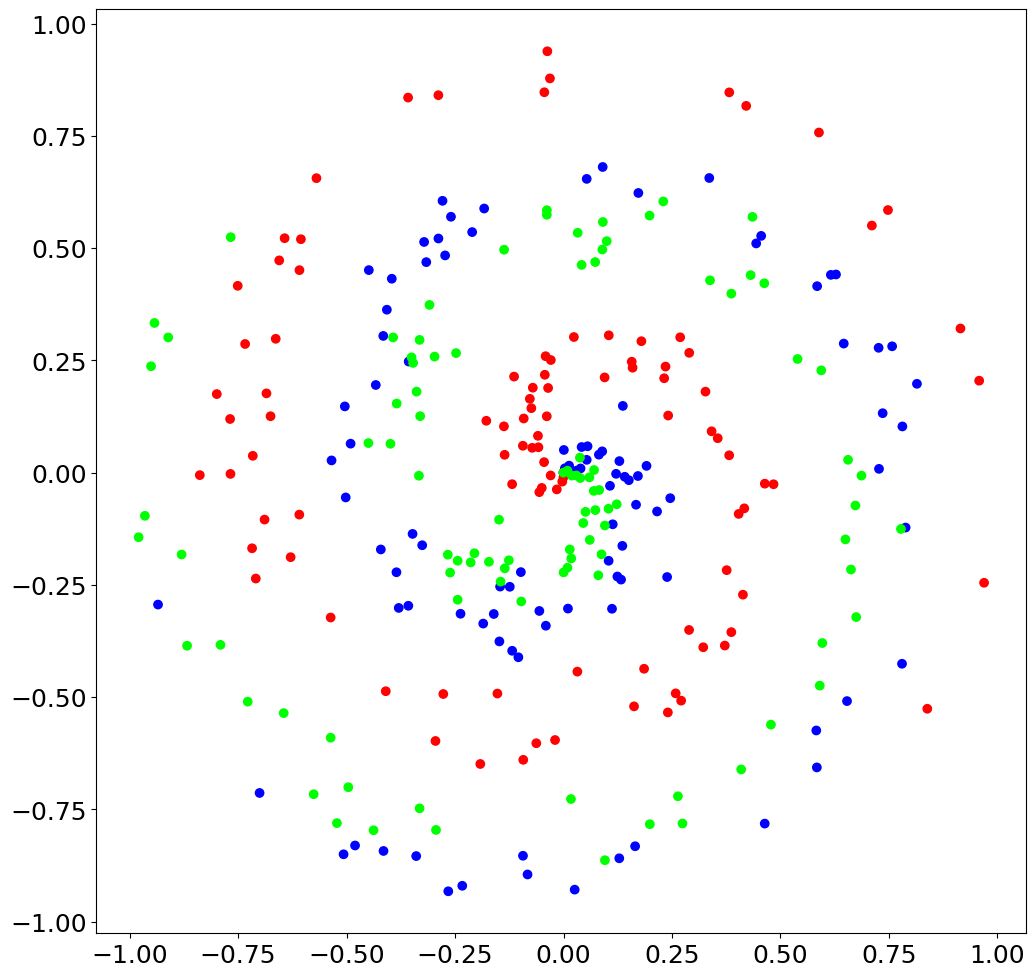

In [51]:
## Generating Non linear data

import numpy as np
from nnfs.datasets import spiral_data
import nnfs
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size':18})

nnfs.init()
X, y = spiral_data(samples = 100, classes = 3)
plt.scatter(X[:,0], X[:,1])
plt.show()

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'brg')
plt.show()

In [52]:
### Dense layer class

class Layer_Dense:
    # Initilaizing layer
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1,n_neurons))
        
    # Forward pass
    def forward(self, inputs):
        self.output = np.dot(inputs,self.weights)+self.biases
        
print("Layer 1: Dense Layer")        
dense1 = Layer_Dense(2,3)
dense1.forward(X)
print(X[:5])
print(dense1.output[:5])



### Activation function: ReLU
## max(0,X) element wise
class Activation_ReLU:
    # forward pass
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        
print("Activation 1: ReLU")
activation1 = Activation_ReLU()
activation1.forward(dense1.output)
print(activation1.output[:5])


print("Layer 2: Dense Layer")
dense2 = Layer_Dense(3,3)
dense2.forward(activation1.output)
print(dense2.output[:5])


### Activation function: SOFTMAX
## convert to probailities using exp function element wise then normalize by row
class Activation_Softmax:
    # forward pass
    def forward(self, inputs):
        # taking the exp values element wise after subtracting by the max value in each row
        exp_val = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        # Normalizing row wise
        self.output = exp_val/np.sum(exp_val, axis = 1, keepdims = True)
        
  
print("Activation 2: Softmax")
activation2 = Activation_Softmax()
activation2.forward(dense2.output)

print(activation2.output[:5])



Layer 1: Dense Layer
[[0.         0.        ]
 [0.00299556 0.00964661]
 [0.01288097 0.01556285]
 [0.02997479 0.0044481 ]
 [0.03931246 0.00932828]]
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]
Activation 1: ReLU
[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]
Layer 2: Dense Layer
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.8183968e-07 -1.5235776e-07  1.2281279e-06]
 [-5.0631292e-07 -4.2422371e-07  3.4195891e-06]
 [-8.4041352e-07 -7.0415609e-07  5.6760728e-06]
 [-1.1393766e-06 -9.5464793e-07  7.6952419e-06]]
Activation 2: Softmax
[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333

In [53]:
### Loss function and cross-entropy loss
class Loss:
    def calculate(self, output, y_true):
        sample_losses = self.forward(output, y_true)
        data_loss = np.mean(sample_losses)
        return data_loss
    
### Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # forward pass
    def forward(self, y_pred, y_true):
        n_samples = len(y_pred)
        # removing the values below 1e-7 and above 1-1e-7
        # clip data to prevent division by 0
        # and if == 1 then the gradient is not feasible as the log(1) =0
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidence = y_pred_clipped[range(n_samples), y_true]
            
        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_pred_clipped*inputs, axis = 1)
        
        negative_log_likelihood = -np.log(correct_confidence)
        return negative_log_likelihood

    
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

print("loss:",loss)

### Calculating accuracy
## calculating using the outputs of activation2
predictions = np.argmax(activation2.output, axis = 1)
if len(y.shape) == 2:
    y1 = np.argmax(y,axis = 1)
else:
    y1 = y

accuracy = np.mean(predictions == y1)
print(accuracy)


loss: 1.0986104
0.34


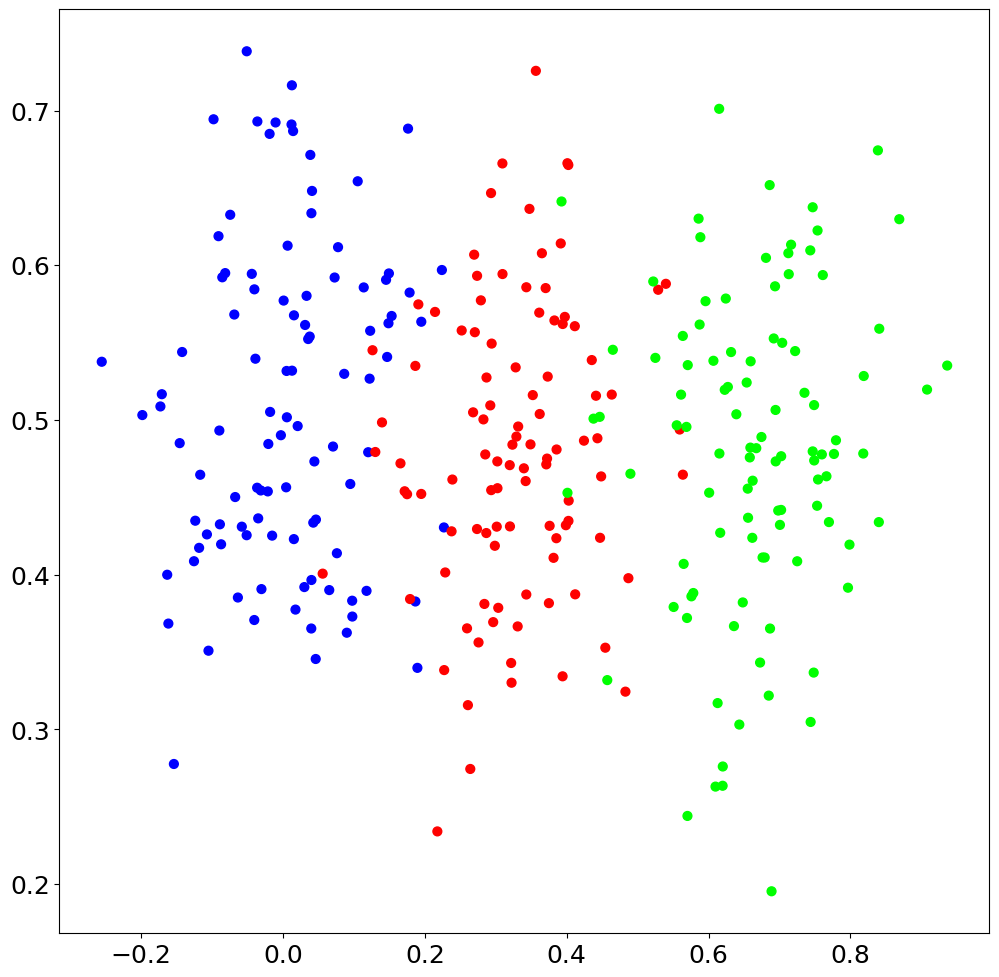

The New minimum loss is given in iteration:  0  with a minimum loss: 1.0986564  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  3  with a minimum loss: 1.098138  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  117  with a minimum loss: 1.0980115  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  124  with a minimum loss: 1.0977516  and accuracy: 0.6
The New minimum loss is given in iteration:  165  with a minimum loss: 1.0975711  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  552  with a minimum loss: 1.0974693  and accuracy: 0.34
The New minimum loss is given in iteration:  778  with a minimum loss: 1.0968257  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  4307  with a minimum loss: 1.0965533  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  4615  with a minimum loss: 1.0964499  and accuracy: 0.33333333333333

In [54]:
### Using Randomly select weigts to get the best results
# Create dataset
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()
X,y = vertical_data(samples = 100, classes = 3)
plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = 'brg')
plt.show()

# Creating model
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

# Creating the loss function
loss_function = Loss_CategoricalCrossentropy()

# Storing variables
min_loss = 999999
best_layer1_weights = dense1.weights.copy()
best_layer1_biases = dense1.biases.copy()
best_layer2_weights = dense2.weights.copy()
best_layer2_biases = dense2.biases.copy()


for i in range(10000):
    # Generating new weights randomly
    dense1.weights = 0.05*np.random.randn(*dense1.weights.shape)
    dense1.biases = 0.05*np.random.randn(*dense1.biases.shape)
    dense2.weights = 0.05*np.random.randn(*dense2.weights.shape)
    dense2.biases = 0.05*np.random.randn(*dense2.biases.shape)
    
    # Forward pass to update the outputs
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Calculating the loss
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)
    
    if loss<min_loss:
        print('The New minimum loss is given in iteration: ', i, ' with a minimum loss:', loss, ' and accuracy:', accuracy)
        best_layer1_weights = dense1.weights.copy()
        best_layer1_biases = dense1.biases.copy()
        best_layer2_weights = dense2.weights.copy()
        best_layer2_biases = dense2.biases.copy()
        min_loss = loss
        

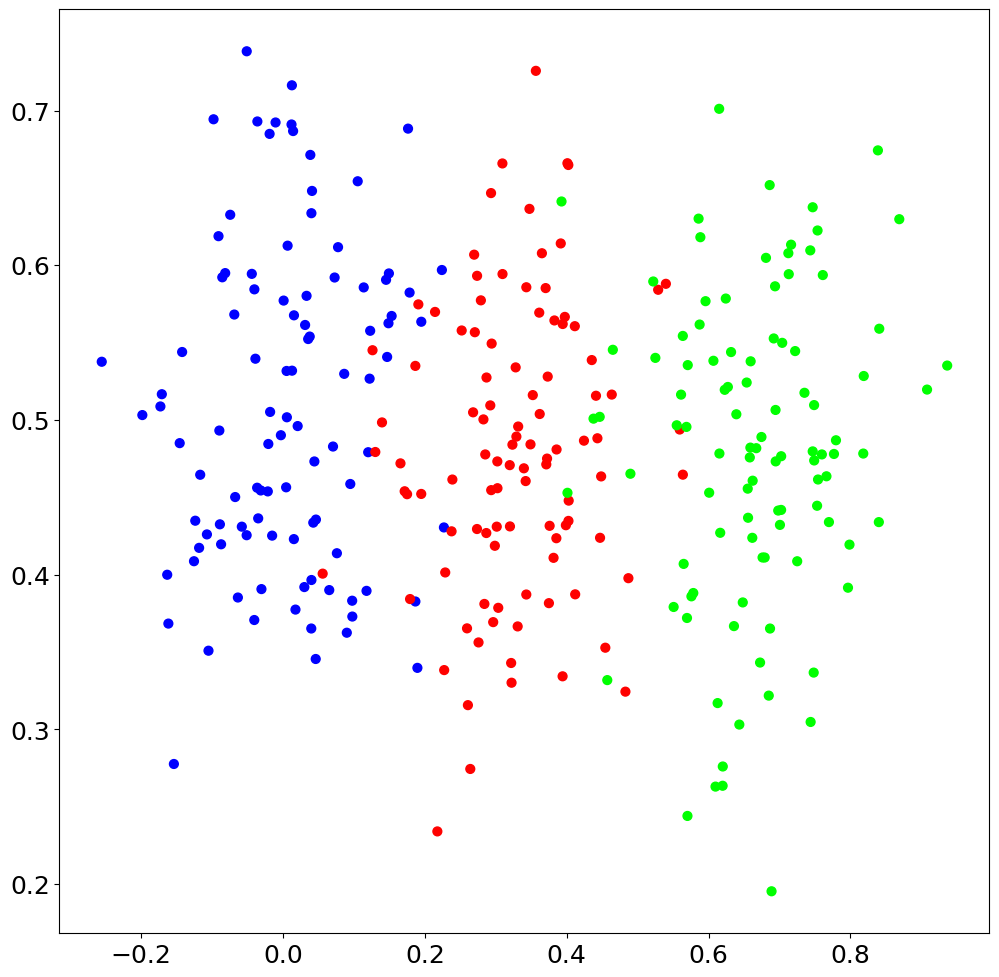

The New minimum loss is given in iteration:  0  with a minimum loss: 1.0987684  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  1  with a minimum loss: 1.0987465  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  5  with a minimum loss: 1.0976487  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  6  with a minimum loss: 1.0972018  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  10  with a minimum loss: 1.0938749  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  19  with a minimum loss: 1.0935849  and accuracy: 0.6666666666666666
The New minimum loss is given in iteration:  20  with a minimum loss: 1.0908297  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  21  with a minimum loss: 1.0905013  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  22  with a minimum loss: 1.0879314  and accurac

In [64]:
### Randomly adjusting weights and biases starting from an initial value
# Create dataset
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()
X,y = vertical_data(samples = 100, classes = 3)
plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = 'brg')
plt.show()

# Creating model
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

# Creating the loss function
loss_function = Loss_CategoricalCrossentropy()

# Storing variables
min_loss = 999999
best_layer1_weights = dense1.weights.copy()
best_layer1_biases = dense1.biases.copy()
best_layer2_weights = dense2.weights.copy()
best_layer2_biases = dense2.biases.copy()


for i in range(10000):
    # Generating new weights randomly
    dense1.weights += 0.05*np.random.randn(*dense1.weights.shape)
    dense1.biases += 0.05*np.random.randn(*dense1.biases.shape)
    dense2.weights += 0.05*np.random.randn(*dense2.weights.shape)
    dense2.biases += 0.05*np.random.randn(*dense2.biases.shape)
    
    # Forward pass to update the outputs
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Calculating the loss
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)
    
    if loss<min_loss:
        print('The New minimum loss is given in iteration: ', i, ' with a minimum loss:', loss, ' and accuracy:', accuracy)
        best_layer1_weights = dense1.weights.copy()
        best_layer1_biases = dense1.biases.copy()
        best_layer2_weights = dense2.weights.copy()
        best_layer2_biases = dense2.biases.copy()
        min_loss = loss
    else: # Reverting the weights and biases
        dense1.weights = best_layer1_weights.copy()
        dense1.biases = best_layer1_biases.copy()
        dense2.weights = best_layer2_weights.copy()
        dense2.biases = best_layer2_biases.copy()
        

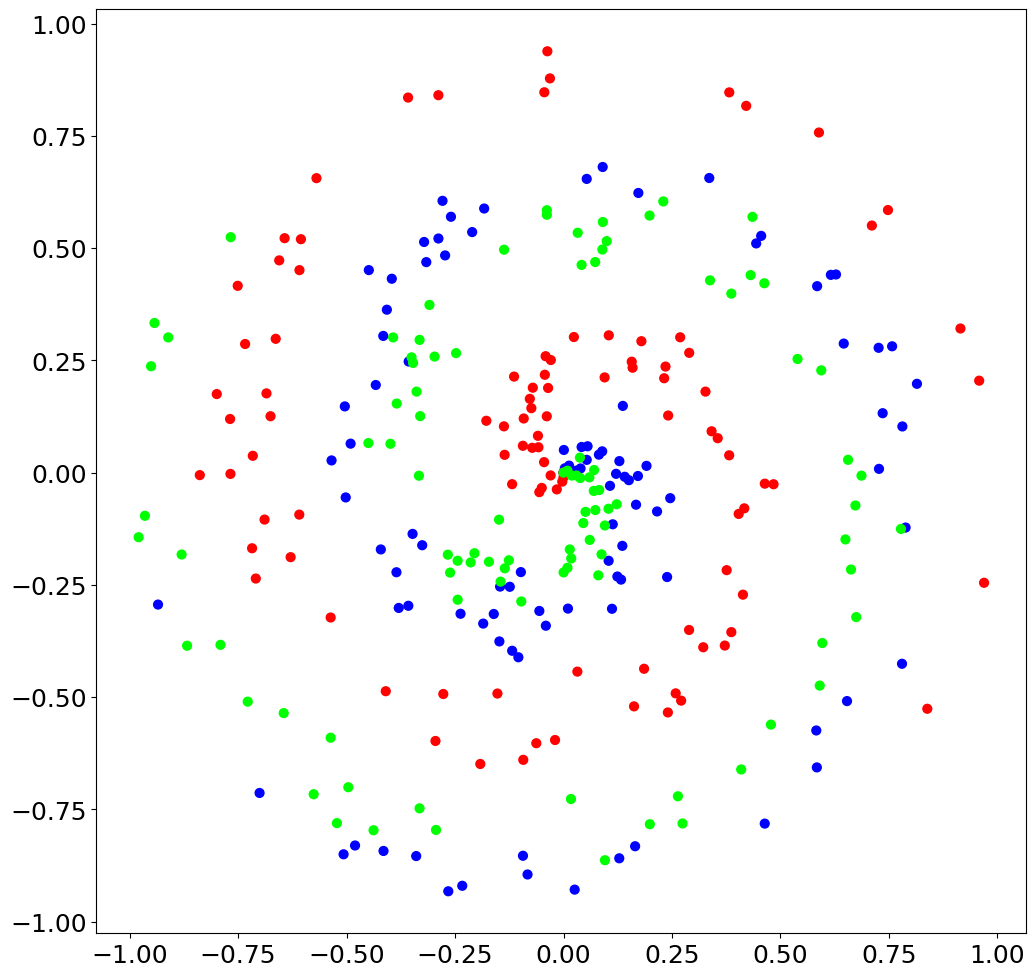

The New minimum loss is given in iteration:  0  with a minimum loss: 1.9461935  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  1  with a minimum loss: 1.3748584  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  2  with a minimum loss: 1.2923785  and accuracy: 0.3466666666666667
The New minimum loss is given in iteration:  3  with a minimum loss: 1.2101604  and accuracy: 0.34
The New minimum loss is given in iteration:  39  with a minimum loss: 1.1906445  and accuracy: 0.37
The New minimum loss is given in iteration:  42  with a minimum loss: 1.092022  and accuracy: 0.3333333333333333
The New minimum loss is given in iteration:  397  with a minimum loss: 1.0882108  and accuracy: 0.36666666666666664
The New minimum loss is given in iteration:  2145  with a minimum loss: 1.0842615  and accuracy: 0.38333333333333336
The New minimum loss is given in iteration:  2388  with a minimum loss: 1.0661552  and accuracy: 0.3566666666666667


In [63]:
# Applying for a Spiral Dataset
### Randomly adjusting weights and biases starting from an initial value
# Create dataset
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()
X,y = spiral_data(samples = 100, classes = 3)
plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = 'brg')
plt.show()

# Creating model
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

# Creating the loss function
loss_function = Loss_CategoricalCrossentropy()

# Storing variables
min_loss = 999999
best_layer1_weights = dense1.weights.copy()
best_layer1_biases = dense1.biases.copy()
best_layer2_weights = dense2.weights.copy()
best_layer2_biases = dense2.biases.copy()


for i in range(10000):
    # Generating new weights randomly
    dense1.weights += np.random.randn(*dense1.weights.shape)
    dense1.biases += np.random.randn(*dense1.biases.shape)
    dense2.weights += np.random.randn(*dense2.weights.shape)
    dense2.biases += np.random.randn(*dense2.biases.shape)
    
    # Forward pass to update the outputs
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Calculating the loss
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)
    
    if loss<min_loss:
        print('The New minimum loss is given in iteration: ', i, ' with a minimum loss:', loss, ' and accuracy:', accuracy)
        best_layer1_weights = dense1.weights.copy()
        best_layer1_biases = dense1.biases.copy()
        best_layer2_weights = dense2.weights.copy()
        best_layer2_biases = dense2.biases.copy()
        min_loss = loss
    else: # Reverting the weights and biases
        dense1.weights = best_layer1_weights.copy()
        dense1.biases = best_layer1_biases.copy()
        dense2.weights = best_layer2_weights.copy()
        dense2.biases = best_layer2_biases.copy()
        

In [61]:
### Backpropagation

import numpy as np
dvalues = np.array([[1., 1., 1.], [2., 2., 2.], [3., 3., 3.]])
inputs = np.array([[1, 2, 3, 2.5], [2, 5., -1, 2], [-1.5, 2.7, 3.3, -0.8]])

"""
The partial derivative w.r.to weights is given by 
dLoss/dweights = XT * dLoss/dz
"""

dweights = np.dot(inputs.T, dvalues)
print(dweights)

"""
The partial derivative w.r.to biases = 1 
dLoss.dbiases = 1* sum(dLoss/dz, for each neuron from each batch)
"""
biases = np.array([[2, 3, 0.5]])
dbiases = np.sum(dvalues, axis = 0, keepdims=1)
print(dbiases)

"""
The partial derivative w.r.to inputs is given by
dLoss/dinputs = dLoss_dz * weightsT
"""

weights = np.array([[0.2, 0.8, -0.5, 1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]).T
dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]
[[6. 6. 6.]]
[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


In [62]:
### Adding Backpropagation to Layer dense class
# class Layer_Dense:
#     ...
# Backward pass
def backward(self, dvalues):
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis = 0, keepdims=1)
    self.dinputs = np.dot(dvalues, self.weights.T)
        
setattr(Layer_Dense, "backward", backward)
        
### Adding Backpropagation to ReLU class
# class Activation_ReLU:
#     ...
# Backward pass
def backward(self, dvalues):
    self.dinputs = dvalues.copy()
    self.dinputs[self.inputs <= 0] = 0
        
setattr(Activation_ReLU, "backward", backward)
           


In [65]:
# dir(Layer_Dense)